In [1]:
from functions.load_training_data import training_samples, load_regression_samples, load_rescaled_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

In [2]:
# start = time.time()
# image_samples, image_labels, mask_composites, full_images = training_samples(1000, [1,1,1,1], load_masks=True)
# print(time.time() - start)

Loading images and mask collections...
	Loading complete.
Creating mask composites...
	Composites complete.
Rescaling Data...
	Data has been rescaled.
Cropping Rescaled Data...
Done!
Data loaded in 1 minutes, 14.92 seconds


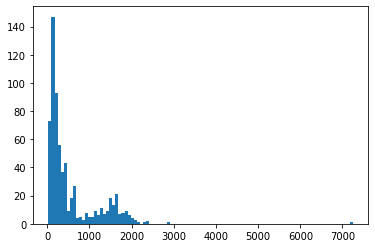

In [3]:
start = time.time()
cropped_sizes, cropped_masks, cropped_imgs = load_rescaled_samples(10000)
end = time.time() - start
print("Data loaded in %d minutes, %.2f seconds" %((end // 60), (end % 60)))

In [4]:
# start = time.time()
# cropped_imgs, cropped_masks, nuclei_sizes, labels = load_regression_samples(full_images, image_labels, mask_composites)
# print(time.time() - start)

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


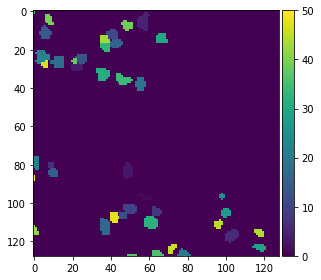

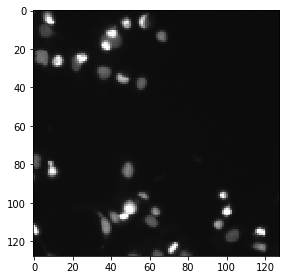

In [5]:
io.imshow(cropped_masks[200]); plt.figure()
io.imshow(cropped_imgs[200])

In [6]:
# find the mean of all the values and divide by std. dev
# with mean and std. dev (x= (x-mean)/ std. dev) --> normalized nuclei sizes
# use np to find both ^

# Configure GPU

In [7]:
from functions.tf_config import config_gpu

config_gpu(2, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 2


# Configure Model

In [8]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=(128, 128, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(32, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [9]:
start = time.time()
img_tensor = tf.convert_to_tensor(list(cropped_imgs))
end = time.time() - start
print("Tensor created in %d minutes, %.2f seconds" %((end // 60), (end % 60)))

Tensor created in 3 minutes, 5.37 seconds


In [10]:
img_tensor.shape

TensorShape([10000, 128, 128, 3])

In [11]:
# start = time.time()
# predictions = model(img_tensor).numpy()
# end = time.time() - start
# print("Initial predictions took %d minutes, %.2f seconds" 
#       %((end // 60), (end % 60)))
# predictions

In [12]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction="auto", name="mean_absolute_error")
# loss_fn(list(cropped_sizes), predictions).numpy()

In [13]:
opt = keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [17]:
size_tensor = tf.convert_to_tensor(list(cropped_sizes))
model.fit(img_tensor, size_tensor, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 2s 6ms/step - loss: 46.7549 - mean_absolute_error: 46.7549
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 45.2589 - mean_absolute_error: 45.2589
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 44.0227 - mean_absolute_error: 44.0227
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 43.5951 - mean_absolute_error: 43.5951
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 43.5947 - mean_absolute_error: 43.5947
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 42.9354 - mean_absolute_error: 42.9354
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 43.8651 - mean_absolute_error: 43.8651
Epoch 8/20
313/313 [==============================] - 2s 6ms/step - loss: 42.9509 - mean_absolute_error: 42.9509
Epoch 9/20
313/313 [==============================] - 2s 6ms/step - loss: 41.6974 - mean_absolut